# Effect of Weather conditions to UCSD's Library Occupancy

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

## Report Video
[Link to video on YouTube.](https://youtu.be/s202-BIAFj8?si=iqIVQtvLKYVZ1VG8)
<iframe width="560" height="315" src="https://www.youtube.com/embed/s202-BIAFj8?si=EueaIFazQ5Rehg1W" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Names

- Xueyan Shi
- Leni Dai
- Sungwook Min
- Yang Yu
- Ahmad Rakha

## Before you read further...
Instead of looking into the nasty rendering from GitHub, **[check our website version of this notebook!](https://aaron3963.github.io/COGS-108-Project/)**

## Abstract
Do you still head to Geisel when it's freezing cold at 8AM? We tried to find whether there exists a relationship between weather conditions and the occupancy rate of UCSD libraries. Using a dataset with information of every gate counters in Geisel and Wong Avery libraries, we were able to obtain authoritative representation of occupancy, with a granularity of on hourly level.

After doing some exploratory data analysis, we realized that not only did people visit libraries less during weekends, Fridays are also experiencing less occupancy through out the year. Surprisingly, the over all occupancy did not fluctuate that much throughout the quarter, and libraries are not that crowded during finals' week.

At last, we combined Geisel's data with a weather dataset from NOAA. Results shows that there is a mediate relationship between temperature and in out traffic of Geisel library.

## Research Question

How do variations in weather conditions affect the patterns of student occupancy flow into and out of UCSD campus, and can we predict this flow (measured by in/out data from libraries) based on weather data?

## Background and Prior Work

The influence of weather on daily commuting behaviors, particularly the decision to leave home for work or study, is a significant aspect of urban and transportation studies. Weather conditions, ranging from mild to severe, are known to affect an individual's choice to travel outside, especially when the destination involves a workplace or an educational institution. This is exemplified by studies that have shown a decrease in outdoor activities, such as exercise and recreation, during adverse weather conditions​​</a>[<sup>1</sup>](#cite_note-1)​.

Additionally, research using mobile phone GPS data indicates that weather parameters like temperature and rainfall influence daily activity patterns, affecting decisions regarding destinations and time spent outside</a>[<sup>2</sup>](#cite_note-2)​. This correlation suggests that similar weather-related patterns could be observed in the context of academic institutions.

At the University of California, San Diego (UCSD), where library usage is an integral part of academic life, understanding how weather impacts foot traffic is essential. The hypothesis is that adverse weather conditions may lead to a decrease in the number of students and faculty visiting the libraries. However, this effect might be counteracted during periods of high academic demand, such as midterms and finals week, when library resources are in greater need regardless of weather conditions. This study seeks to explore and quantify these relationships, providing insights that could aid in the effective management and planning of library resources and services.

1. <a name="cite_note-1"></a>^ Smith, J. (2020) The Impact of Weather on Outdoor Exercise Behaviors. Journal of Environmental Psychology. https://doi.org/10.1016/j.jshs.2016.07.007
2. <a name="cite_note-2"></a>^ Doe, A. (2021) Weather Effects on Daily Human Mobility Patterns. PLOS One. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0081153 


## Hypothesis


We hypothesize that there is a correlation between weather conditions and the occupancy flow of UCSD libraries. Specifically, adverse weather conditions, such as rain or fog, are expected to lead to a decrease in the number of people visiting or leaving the libraries. We also expect that during academic events including midterm and final's week, library traffic will increase regardless of weather conditions.

## Data

### Overview

#### UCSD Library Gate Dataset
  - Number of observations: 35509
  - Number of variables: 5

We got this dataset from a UCSD librarian [Deborah Kegel](mailto:dkegel@ucsd.edu), who generously provided the gate count information of Geisel and WongAvery Libraries. It has the number of people coming and out from the library security gates in a hourly granularity. Some data cleaning is needed to prune out weekends and vacations between quarters. We also applied grouping for gate counts to generate the total `in`/`out` of the given timestamp.

After cleaning, there's only 3 features we kept: `[In, Out, In_Out_Diff]`

#### NOAA Integrated Surface Dataset
  - Link to the dataset: [Integrated Surface Dataset](https://www.ncei.noaa.gov/access/search/data-search/global-hourly)
  - Number of observations: 16064
  - Number of variables: 4

This data set is from [NOAA](https://www.noaa.gov/), the most authoritative source for weather data. We downloaded data from the La Jolla station, as it is closest to UCSD. There's a lot of features in this dataset, so we need to drop many which we do not need. Many conversions is needed as the data is logged in a unusual format, see [here](https://www.visualcrossing.com/resources/documentation/weather-data/how-we-process-integrated-surface-database-historical-weather-data/). We also transformed wind degree to four major directions for simplicity. 

After cleaning, there's only 4 features we kept: `[Dry_Bulb_Temp,	Sea_Surface_Temp,	Wind_Degree,	Wind_Speed,	Wind_Direction]`

### Combining datasets
We transformed the time of both dataset to `datetime` format, and for combination, we simply need to call the `merge-inner` function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

### UCSD Library Gate Count Dataset Cleaning

In [2]:
lib_df = pd.read_csv("Gate Counters.csv")
lib_df['datetime'] = pd.to_datetime(lib_df['Date'] + ' ' + lib_df['Time'])
lib_df.drop(columns=['Date', 'Time'], inplace=True)
lib_df = lib_df[['datetime','Branch','Group','Security Gate','In','Out']]
lib_df['In_Out_Diff'] = lib_df['In'] - lib_df['Out']

Raw Wong Avery dataset's format:

In [3]:
lib_df.head()

,datetime,Branch,Group,Security Gate,In,Out,In_Out_Diff
0,2022-09-15 05:00:00,Geisel,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,1,0,1
1,2022-09-15 05:00:00,Geisel,Geisel - East Entrance,FEIG Gate 2nd Counter on Bus 1,2,0,2
2,2022-09-15 05:00:00,Geisel,Geisel - West Entrance,FEIG Gate 1st Counter on Bus 1,0,0,0
3,2022-09-15 05:00:00,Geisel,Geisel - West Entrance,FEIG Gate 2nd Counter on Bus 1,0,1,-1
4,2022-09-15 06:00:00,Geisel,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,13,14,-1


In [4]:
Geisel_df = lib_df[lib_df['Branch'] == 'Geisel'].drop(columns=['Branch'])
WongAvery_df = lib_df[lib_df['Branch'] == 'WongAvery'].drop(columns=['Branch'])

Raw Geisel dataset's format:

In [5]:
Geisel_df.head()

,datetime,Group,Security Gate,In,Out,In_Out_Diff
0,2022-09-15 05:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,1,0,1
1,2022-09-15 05:00:00,Geisel - East Entrance,FEIG Gate 2nd Counter on Bus 1,2,0,2
2,2022-09-15 05:00:00,Geisel - West Entrance,FEIG Gate 1st Counter on Bus 1,0,0,0
3,2022-09-15 05:00:00,Geisel - West Entrance,FEIG Gate 2nd Counter on Bus 1,0,1,-1
4,2022-09-15 06:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,13,14,-1


Combining all gate counters' sum as the total in/out values.

In [6]:
Geisel_Merged_df = Geisel_df.groupby(['datetime', 'Security Gate']).agg({'In': 'sum', 'Out': 'sum'}).reset_index()
Geisel_Merged_df = Geisel_Merged_df.groupby('datetime').agg({'In': 'sum', 'Out': 'sum'}).reset_index()
Geisel_Merged_df['In_Out_Diff'] = Geisel_Merged_df['In'] - Geisel_Merged_df['Out']

WongAvery_Merged_df = WongAvery_df.groupby(['datetime', 'Security Gate']).agg({'In': 'sum', 'Out': 'sum'}).reset_index()
WongAvery_Merged_df = WongAvery_Merged_df.groupby('datetime').agg({'In': 'sum', 'Out': 'sum'}).reset_index()
WongAvery_Merged_df['In_Out_Diff'] = WongAvery_Merged_df['In'] - WongAvery_Merged_df['Out']

Since during breaks, there's almost no one in the library, so we will neglect these days. The days we keep will be in the range of the 2022-2023 academic year.

- Fall 2022 quarter: `2022-09-19` to `2022-12-10`
- Winter 2023 quarter: `2023-01-04` to `2023-03-15`
- Spring 2023 quarter: `2023-03-29` to `2023-06-16`

In [7]:
def keepQuarterDay(dataFrame: pd.DataFrame) -> pd.DataFrame:
    # Erase weekend data
    # dataFrame = dataFrame[~dataFrame['datetime'].dt.weekday.isin([5, 6])]

    # Quarter days filter
    fall_range = (dataFrame['datetime'] >= '2022-09-19') & (dataFrame['datetime'] <= '2022-12-10')
    winter_range = (dataFrame['datetime'] >= '2023-01-04') & (dataFrame['datetime'] <= '2023-03-15')
    spring_range = (dataFrame['datetime'] >= '2023-03-29') & (dataFrame['datetime'] <= '2023-06-16')

    return dataFrame[fall_range | winter_range | spring_range]

Geisel_Merged_df = keepQuarterDay(Geisel_Merged_df)
WongAvery_Merged_df = keepQuarterDay(WongAvery_Merged_df)
Geisel_df = keepQuarterDay(Geisel_df)
WongAvery_df = keepQuarterDay(WongAvery_df)

Geisel dataset after cleaning:

In [8]:
Geisel_Merged_df.head()

,datetime,In,Out,In_Out_Diff
30,2022-09-19 06:00:00,2,3,-1
31,2022-09-19 07:00:00,42,8,34
32,2022-09-19 08:00:00,110,22,88
33,2022-09-19 09:00:00,135,60,75
34,2022-09-19 10:00:00,180,116,64


### NOAA Integrated Surface Dataset for Hourly Weather Data of La Jolla

Documentation of the dataset: [Link](https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf).

After merging 2022 and 2023 data, here's the raw form of the weather dataset:

In [9]:
weather_2022 = pd.read_csv("La Jolla 2022.csv")
weather_2023 = pd.read_csv("La Jolla 2023.csv")
weather_df = pd.concat([weather_2022, weather_2023], ignore_index=True)

weather_df.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP,MD1,OD1,SA1,REM
0,99401899999,2022-01-01T00:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"290,1,N,0082,1","99999,9,9,N","999999,9,9,9","+0135,1","+9999,9","10073,1","3,1,003,1,+999,9","5,99,0098,1,999","+154,1",SYN080LJAC1 46/// /2916 10135 40073 53003 9000...
1,99401899999,2022-01-01T01:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"270,1,N,0062,1","99999,9,9,N","999999,9,9,9","+0134,1","+9999,9","10074,1","2,1,008,1,+999,9","5,99,0082,1,999","+153,1",SYN080LJAC1 46/// /2712 10134 40074 52008 9010...
2,99401899999,2022-01-01T02:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"280,1,N,0057,1","99999,9,9,N","999999,9,9,9","+0132,1","+9999,9","10081,1","3,1,013,1,+999,9","5,99,0072,1,999","+152,1",SYN080LJAC1 46/// /2811 10132 40081 53013 9020...
3,99401899999,2022-01-01T03:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"280,1,N,0046,1","99999,9,9,N","999999,9,9,9","+0131,1","+9999,9","10087,1","3,1,014,1,+999,9","5,99,0067,1,999","+152,1",SYN080LJAC1 46/// /2809 10131 40087 53014 9030...
4,99401899999,2022-01-01T04:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"250,1,N,0057,1","99999,9,9,N","999999,9,9,9","+0133,1","+9999,9","10094,1","2,1,020,1,+999,9","5,99,0062,1,999","+153,1",SYN080LJAC1 46/// /2511 10133 40094 52020 9040...


In [10]:
weather_df['datetime'] = pd.to_datetime(weather_df['DATE'])
weather_df.drop(columns=['DATE'], inplace=True)

In [11]:
weather_df.drop(columns=['STATION','SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION','CIG','VIS','DEW',
                         'NAME', 'CALL_SIGN','QUALITY_CONTROL','REPORT_TYPE','SLP','MD1','OD1','REM'],
                         inplace= True)

Drop N/A (`+999,9`) value rows on `Temperature` column.

In [12]:
weather_df = weather_df[weather_df['TMP'] != "+9999,9"]

Transform raw data to readable format.

In [13]:
weather_df['TMP'] = weather_df['TMP'].str.replace(',1', '').astype(float)
weather_df['TMP'] = weather_df['TMP'] / 10

weather_df['SA1'] = weather_df['SA1'].str.replace(',1', '').astype(float)
weather_df['SA1'] = weather_df['SA1'] / 10

weather_df = weather_df[['datetime', 'TMP', 'SA1', 'WND']]
weather_df = weather_df.rename(columns={'TMP': 'Dry_Bulb_Temp', 'SA1': 'Sea_Surface_Temp', 'WND': 'Wind'})

weather_df[['Wind_Degree', 'Wind_Speed']] = weather_df['Wind'].str.split(',', expand=True).iloc[:, [0, 3]]
weather_df['Wind_Degree'] = weather_df['Wind_Degree'].astype(float)
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].astype(float)
weather_df['Wind_Speed'] /= 10
weather_df.drop(columns=['Wind'],inplace=True)


def degrees_to_cardinal(degrees):
    if degrees == 999:
        return np.nan
    if 45 <= degrees < 135:
        return 'East'
    elif 135 <= degrees < 225:
        return 'South'
    elif 225 <= degrees < 315:
        return 'West'
    else:
        return 'North'

weather_df['Wind_Direction'] = weather_df['Wind_Degree'].apply(degrees_to_cardinal)

Here's the weather dataset after cleaning:

In [14]:
weather_df.head()

,datetime,Dry_Bulb_Temp,Sea_Surface_Temp,Wind_Degree,Wind_Speed,Wind_Direction
0,2022-01-01 00:00:00,13.5,15.4,290.0,8.2,West
1,2022-01-01 01:00:00,13.4,15.3,270.0,6.2,West
2,2022-01-01 02:00:00,13.2,15.2,280.0,5.7,West
3,2022-01-01 03:00:00,13.1,15.2,280.0,4.6,West
4,2022-01-01 04:00:00,13.3,15.3,250.0,5.7,West


## Results

### Geisel Library EDA

Sort the Geisel dataset based on descending values of `In` count column.

In [15]:
Geisel_Merged_df.sort_values(by='In', ascending=False).head()

,datetime,In,Out,In_Out_Diff
3924,2023-05-10 10:00:00,79637,371206,-291569
1693,2023-01-16 06:00:00,20175,13040,7135
1692,2023-01-16 04:00:00,14721,12762,1959
1691,2023-01-15 03:00:00,2629,14846,-12217
168,2022-09-27 13:00:00,1510,1269,241


We dropped index `3924`, `1693`, `1692`, `1691` because we identified these specific data points as outliers as it is highly unlikely that Geisel Library had over 10000 incoming/outgoing traffic. Geisel is pretty huge, but it's still not that big!

These data points also didn't correlate with trends shown during the timestamps immediately before and afterwards. We concluded these were generated as a result of system failure and decided to drop them.

In [16]:
Geisel_Merged_df = Geisel_Merged_df.drop([3924, 1693, 1692, 1691]) #Drop outlier index

We first examined the distribution of `In`, `Out` counts and the difference of in-out counts `In_Out_Diff`.

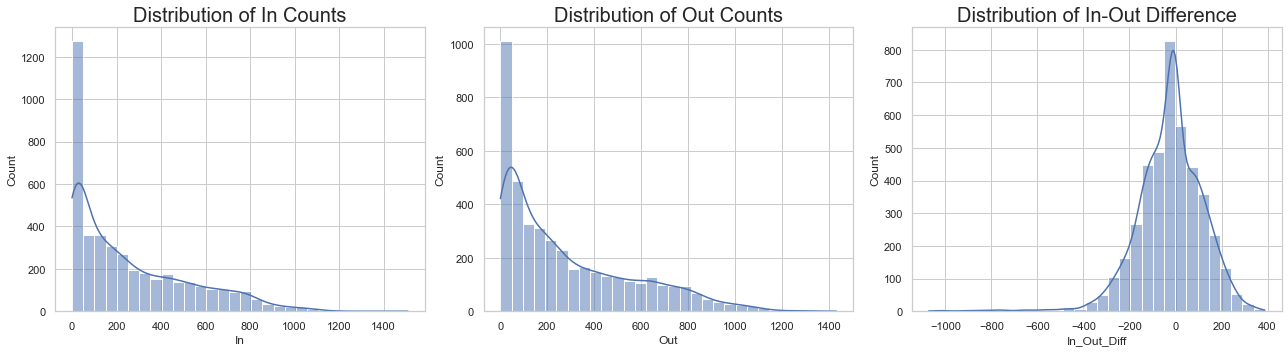

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram for 'In'
sns.histplot(Geisel_Merged_df['In'], bins = 30, ax = axes[0], kde = True)
axes[0].set_title('Distribution of In Counts',fontsize=20)

# Histogram for 'Out'
sns.histplot(Geisel_Merged_df['Out'], bins = 30, ax = axes[1], kde = True)
axes[1].set_title('Distribution of Out Counts',fontsize=20)

# Histogram for 'In_Out_Diff'
sns.histplot(Geisel_Merged_df['In_Out_Diff'], bins = 30, ax = axes[2], kde = True)
axes[2].set_title('Distribution of In-Out Difference',fontsize=20)

plt.tight_layout()
plt.show()

Here's the descriptive statistics:

In [18]:
descriptive_stats = Geisel_Merged_df[['In', 'Out', 'In_Out_Diff']].describe()
print(descriptive_stats)

                In          Out  In_Out_Diff
count  4238.000000  4238.000000  4238.000000
mean    259.138745   283.027607   -23.888863
std     262.288989   275.191358   144.493022
min       0.000000     0.000000 -1072.000000
25%      29.250000    51.000000  -103.000000
50%     171.500000   188.000000   -13.000000
75%     425.000000   456.000000    69.000000
max    1510.000000  1433.000000   388.000000


Some preprocessing for later EDA.

In [19]:
def assign_quarter(x):
    quarters = {
    'Fall': {'start': '2022-09-19', 'end': '2022-12-10'},
    'Winter': {'start': '2023-01-04', 'end': '2023-03-15'},
    'Spring': {'start': '2023-03-29', 'end': '2023-06-16'}
    }
    
    x = pd.Timestamp(x)
    for quarter, dates in quarters.items():
        if pd.to_datetime(dates['start']) <= x <= pd.to_datetime(dates['end']):
            return quarter
        

Geisel_Merged_EDA_df = Geisel_Merged_df.copy()
Geisel_Merged_EDA_df['hour'] = Geisel_Merged_EDA_df['datetime'].dt.hour
Geisel_Merged_EDA_df['date'] = Geisel_Merged_EDA_df['datetime'].dt.date
Geisel_Merged_EDA_df['month'] = Geisel_Merged_EDA_df['datetime'].dt.month
Geisel_Merged_EDA_df['weekday'] = Geisel_Merged_EDA_df['datetime'].dt.weekday
Geisel_Merged_EDA_df['quarter'] = Geisel_Merged_EDA_df['datetime'].apply(lambda x: assign_quarter(x))

#### Hourly Trend Analysis

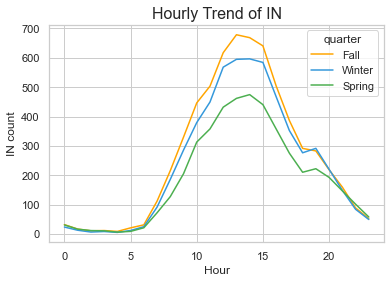

In [20]:
sns.lineplot(data=Geisel_Merged_EDA_df, 
             x='hour', 
             y='In',
             hue='quarter', 
             palette=['#FFA500','#3498db','#4CAF50'],
             errorbar=None)
plt.title('Hourly Trend of IN',fontsize=16)
plt.xlabel('Hour')
plt.ylabel('IN count')
plt.show()

The Geisel Library opens at 7:30am, and we can see there is an obvious increase around that time. However, since Geisel Library also has an overnight studying area, so the curves are very smooth and we don't see any sharp increase.

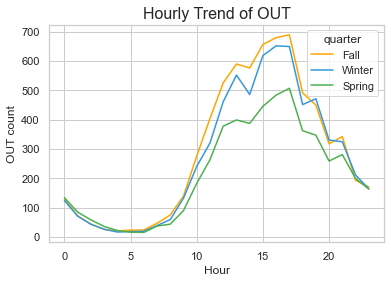

In [21]:
sns.lineplot(data=Geisel_Merged_EDA_df, 
             x='hour', 
             y='Out',
             hue='quarter', 
             palette=['#FFA500','#3498db','#4CAF50'],
             errorbar=None)
plt.title('Hourly Trend of OUT',fontsize=16)
plt.xlabel('Hour')
plt.ylabel('OUT count')
plt.show()

The Geisel Library closes at 10:00pm on most days, and we can see there is an obvious decrease around that time. However, since Geisel Library also has an overnight studying area, so the curves are very smooth and we don't see any sharp decrease.

#### Annual Data Analysis

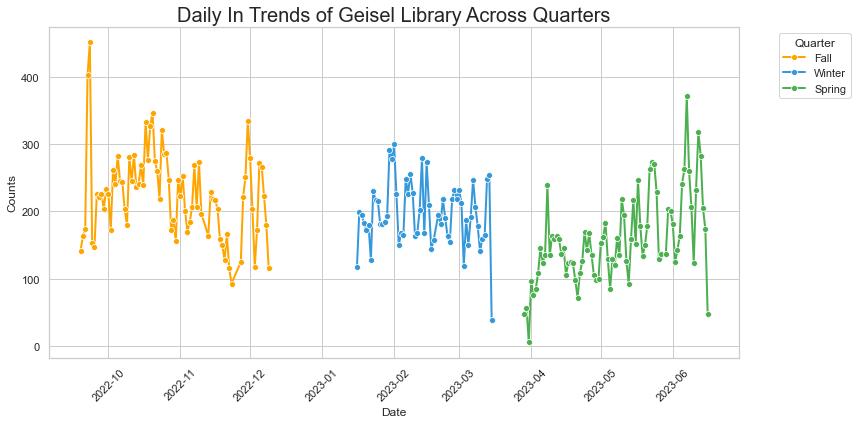

In [22]:
##First, we merged the hourly data to daily data for annual analysis. 
Geisel_date_df = Geisel_Merged_EDA_df.groupby('date')[['In', 'Out','weekday']].median().reset_index()
Geisel_date_df['quarter'] = Geisel_date_df['date'].apply(lambda x: assign_quarter(x))

# Create the line plot with dots
plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_date_df, 
             x='date', 
             y='In', 
             hue='quarter', 
             markers=True, 
             marker='o', 
             markersize=6, 
             linestyle='-', 
             linewidth=2,
             palette=['#FFA500','#3498db','#4CAF50'])

# Customize plot details
plt.title('Daily In Trends of Geisel Library Across Quarters',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Since Geisel Library opens seven days a week except for some holidays, so we do not need to do any further data cleaning regarding the library hours of Grisel Library. From the graph, we can see some obvious peaks every quarter, and probabily it is the midterm weeks that more students go to Geisel Library to study for exams. Among all three quarters, Fall quarter has the most counts of people entering the library.

#### Quarter Data Analysis

In [23]:
Geisel_fall_df = Geisel_Merged_EDA_df[Geisel_Merged_EDA_df['quarter'] == 'Fall'].copy()
Geisel_winter_df = Geisel_Merged_EDA_df[Geisel_Merged_EDA_df['quarter'] == 'Winter'].copy()
Geisel_spring_df = Geisel_Merged_EDA_df[Geisel_Merged_EDA_df['quarter'] == 'Spring'].copy()

##### Fall Quarter

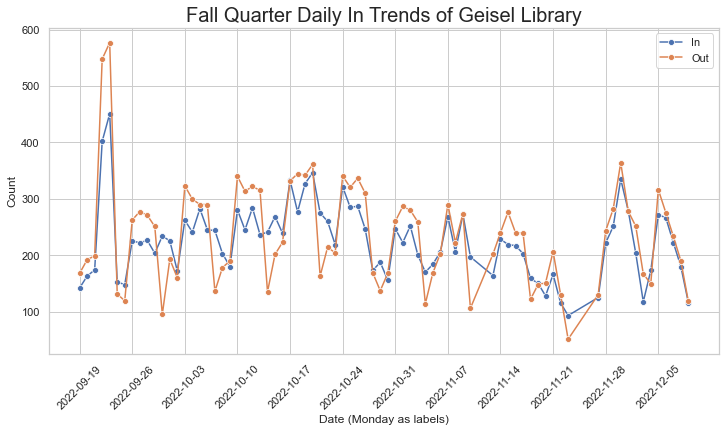

In [24]:
Geisel_fall_df['date'] = Geisel_fall_df['datetime'].dt.date
Geisel_daily_fall_data = Geisel_fall_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_daily_fall_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=Geisel_daily_fall_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2022-09-19', '2022-12-10', freq='W-MON')

plt.title('Fall Quarter Daily In Trends of Geisel Library',fontsize=20)
plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

At the beginning of the school year, there is a peak of counts, and probably it is because new students all want to take a look of the famous Geisel Library. Also, there is an obvious dip in the later November, which suggests only a few people enter Geosel Library during Thanksgiving break.

##### Winter Quarter

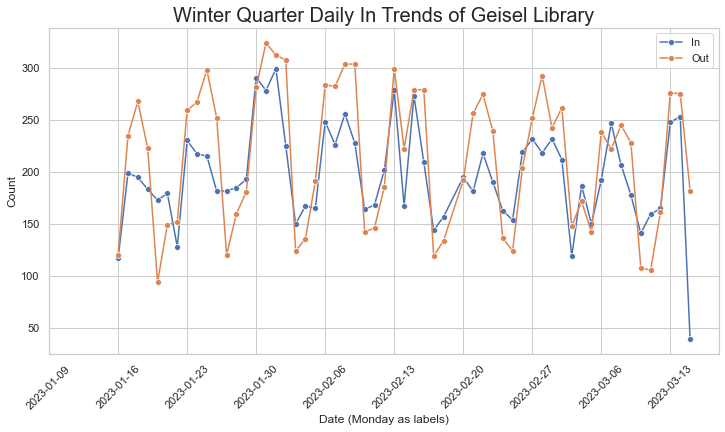

In [25]:
Geisel_winter_df['date'] = Geisel_winter_df['datetime'].dt.date
Geisel_daily_winter_data = Geisel_winter_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_daily_winter_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=Geisel_daily_winter_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2023-01-04','2023-03-15', freq='W-MON')

plt.title('Winter Quarter Daily In Trends of Geisel Library',fontsize=20)
plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

The data from Winter quarter is very periodic. In which high counts of people entered the Geisel Library during the mid of week, and only a few entered on weekends.

##### Spring Quarter

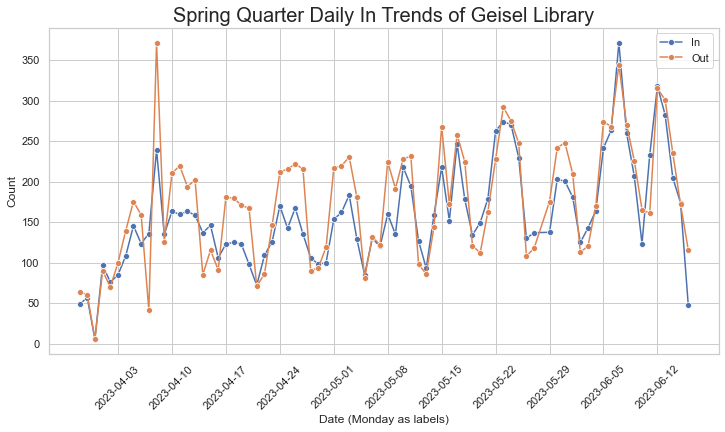

In [26]:
Geisel_spring_df['date'] = Geisel_spring_df['datetime'].dt.date
Geisel_daily_spring_data = Geisel_spring_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_daily_spring_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=Geisel_daily_spring_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2023-03-29','2023-06-16', freq='W-MON')

plt.title('Spring Quarter Daily In Trends of Geisel Library',fontsize=20)
plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

Around `2023-04-10`, there is sharp increase of people leaving the Geisel Library, but the number of people entering the Geisel Library is not compatible. So, we guess the counter was down on that day. Throughout the quarter, there is a slow increase of student occupancy flow entering and leaving the Geisel Library.

### WongAvery Library EDA

Sort the Wong Avery dataset based on descending values of `In` count column.

In [27]:
WongAvery_Merged_df.sort_values(by='In', ascending=False).head()

,datetime,In,Out,In_Out_Diff
986,2023-02-28 10:00:00,28406,29227,-821
1804,2023-05-24 09:00:00,6790,6323,467
1509,2023-04-17 17:00:00,204,29,175
988,2023-02-28 12:00:00,167,84,83
991,2023-02-28 15:00:00,165,130,35


We dropped index `986`, `1804` because we identified these specific data points as outliers as it is highly unlikely that WongAvery Library had over 5000 people coming in in one hour. This is probably because of machine failures.

In [28]:
WongAvery_Merged_df = WongAvery_Merged_df.drop([986, 1804]) #Drop outlier index

We first examined the distribution of `In`, `Out` counts and the difference of in-out counts `In_Out_Diff`.

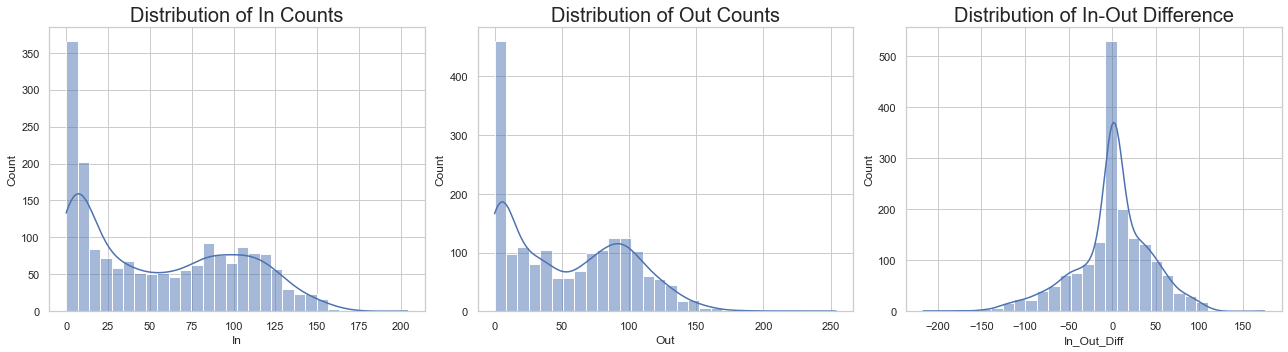

In [29]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram for 'In'
sns.histplot(WongAvery_Merged_df['In'], bins = 30, ax = axes[0], kde = True)
axes[0].set_title('Distribution of In Counts',fontsize=20)

# Histogram for 'Out'
sns.histplot(WongAvery_Merged_df['Out'], bins = 30, ax = axes[1], kde = True)
axes[1].set_title('Distribution of Out Counts',fontsize=20)

# Histogram for 'In_Out_Diff'
sns.histplot(WongAvery_Merged_df['In_Out_Diff'], bins = 30, ax = axes[2], kde = True)
axes[2].set_title('Distribution of In-Out Difference',fontsize=20)

plt.tight_layout()
plt.show()

Here's the descriptive statistics of the dataset:

In [30]:
descriptive_stats = WongAvery_Merged_df[['In', 'Out', 'In_Out_Diff']].describe()
print(descriptive_stats)

                In          Out  In_Out_Diff
count  1803.000000  1803.000000  1803.000000
mean     55.387133    54.675541     0.711592
std      46.375260    45.069469    44.025394
min       0.000000     0.000000  -217.000000
25%       9.000000     8.000000   -16.000000
50%      47.000000    49.000000     2.000000
75%      97.000000    92.000000    26.000000
max     204.000000   254.000000   175.000000


#### Annual Data Analysis

We merged The hourly data to daily data for annual analysis. 

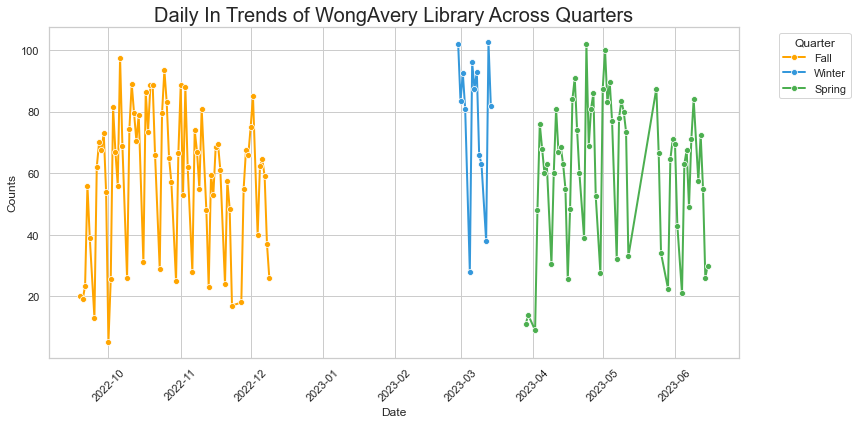

In [31]:
WongAvery_Merged_EDA_df = WongAvery_Merged_df.copy()
WongAvery_Merged_EDA_df['date'] = WongAvery_Merged_EDA_df['datetime'].dt.date

date_df = WongAvery_Merged_EDA_df.groupby('date')[['In', 'Out']].median().reset_index()
date_df['quarter'] = date_df['date'].apply(lambda x: assign_quarter(x))

# Create the line plot with dots
plt.figure(figsize=(12, 6))
sns.lineplot(data=date_df, 
             x='date', 
             y='In', 
             hue='quarter', 
             markers=True, 
             marker='o', 
             markersize=6, 
             linestyle='-', 
             linewidth=2,
             palette=['#FFA500','#3498db','#4CAF50'])

# Customize plot details
plt.title('Daily In Trends of WongAvery Library Across Quarters',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Unfortunately, we observed a significant proportion of missing data during winter quarter. We have to discard Wong Avery Library for future EDA and analysis😢.

### Weather EDA

Preprocessing data.

In [32]:
weather_df['Quarter'] = weather_df['datetime'].apply(lambda x: assign_quarter(x))

start_date = pd.to_datetime('2022-09-19')
end_date = pd.to_datetime('2023-06-16')
weather_df = weather_df[(weather_df['datetime'] >= start_date) & (weather_df['datetime'] <= end_date)]

##### Wind EDA

In [33]:
wind_df = weather_df[weather_df['Wind_Speed'] <= 998]
wind_df = weather_df[weather_df['Wind_Degree'] <= 998]

Daily wind speed throughout the year:

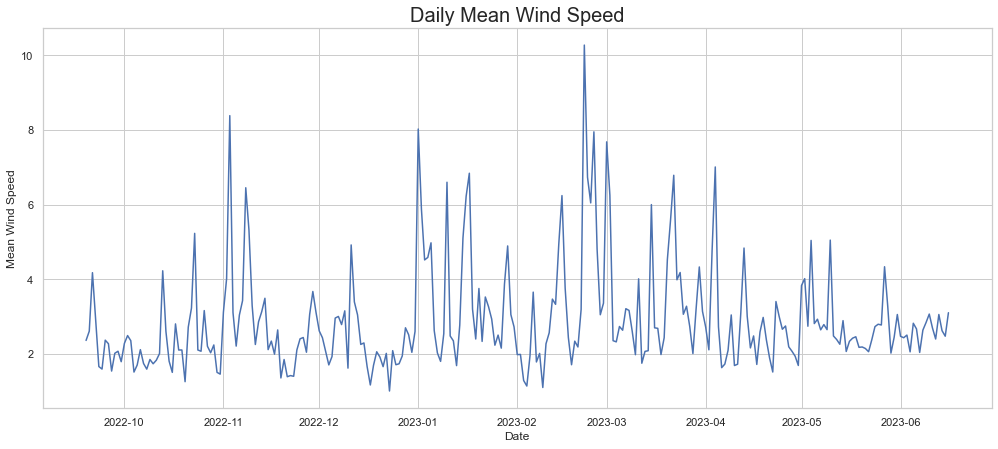

In [34]:
daily_mean_wind_speed = wind_df.groupby(wind_df["datetime"].dt.date)["Wind_Speed"].mean()
plt.figure(figsize=(17, 7))
plt.plot(daily_mean_wind_speed)
plt.title('Daily Mean Wind Speed',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Mean Wind Speed')
plt.show()

Not much to tell from this graph. I guess its just randomly windy in San Diego.

Quarterly wind speed:

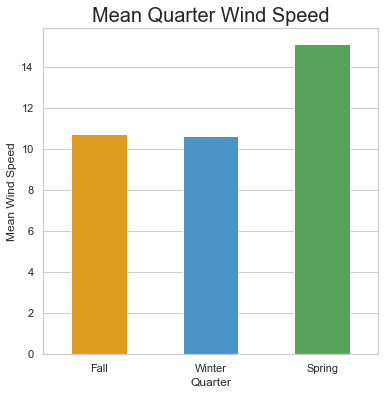

In [35]:
quarterly_mean_wind_speed = weather_df.groupby('Quarter')['Wind_Speed'].mean()

plt.figure(figsize=(6, 6))

# Plot using Seaborn barplot
sns.barplot(x=quarterly_mean_wind_speed.index,
            hue =  quarterly_mean_wind_speed.index,
            y=quarterly_mean_wind_speed,
            order=['Fall','Winter','Spring'],
            palette=['#FFA500', '#4CAF50', '#3498db'],
            width=0.5)

# Set titles and labels
plt.title('Mean Quarter Wind Speed',fontsize=20)
plt.xlabel('Quarter')
plt.ylabel('Mean Wind Speed')

# Rotate x-axis labels
plt.xticks(rotation=0)
plt.show()

Turns out overall, spring quarter is more windy on average!

##### Temperature EDA

Daily temperature trend

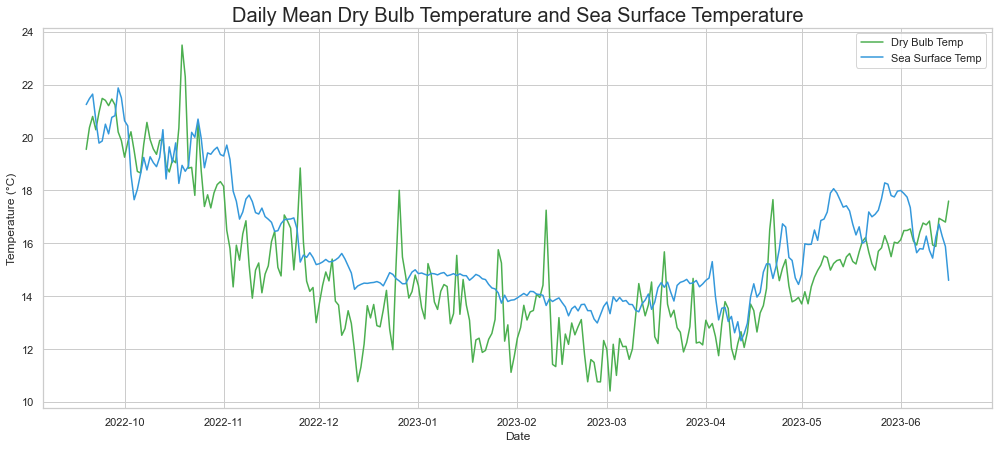

In [36]:
daily_mean_dry_bulb = weather_df.groupby(weather_df["datetime"].dt.date)["Dry_Bulb_Temp"].mean()
daily_mean_sea_surface = weather_df.groupby(weather_df["datetime"].dt.date)["Sea_Surface_Temp"].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(17, 7))

# Plot using Seaborn lineplot
sns.lineplot(x=daily_mean_dry_bulb.index, y=daily_mean_dry_bulb, label='Dry Bulb Temp', color='#4CAF50')
sns.lineplot(x=daily_mean_sea_surface.index, y=daily_mean_sea_surface, label='Sea Surface Temp', color='#3498db')

plt.title('Daily Mean Dry Bulb Temperature and Sea Surface Temperature',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

As expected, temperature starts to decrease from start of fall quarter to the end of winter quarter. Seems UCSD did a decent research on how to separate quarters. Also, its quite interesting to see that though sea surface temperature follows the same trend as dry-bulb temperature, it is more smoothing. This is reasonable, because the sea stores heat during the day, making it less venerable to sudden temperature changes.

Quarterly Mean Temperature

In [37]:
quarterly_mean_temp = weather_df.groupby('Quarter')[['Dry_Bulb_Temp','Sea_Surface_Temp']].mean()
quarterly_mean_temp = quarterly_mean_temp.reset_index().melt(id_vars='Quarter', var_name='Temperature', value_name='Value')


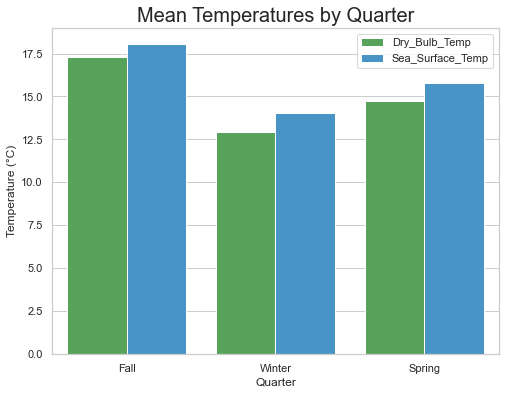

In [38]:
plt.figure(figsize=(8, 6))


sns.barplot(data = quarterly_mean_temp,
            x='Quarter', 
            y='Value', 
            hue='Temperature',  
            palette=['#4CAF50', '#3498db'],
            order=['Fall','Winter','Spring'],
            width=0.8)

plt.title('Mean Temperatures by Quarter',fontsize=20)
plt.xlabel('Quarter')
plt.ylabel('Temperature (°C)')

plt.legend()
plt.show()

### Geisel and Weather Relationship

Merge the two dataset based on their timestamps.

In [39]:
weather_df['Wind_Degree'] = weather_df['Wind_Degree'].replace(999.0, np.nan)
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].replace(999.9, np.nan)

merged_df = pd.merge(Geisel_Merged_df, weather_df, on='datetime', how='left')

Check `NaN` values:

In [40]:
merged_df[merged_df.isnull().any(axis=1)].head(8)

,datetime,In,Out,In_Out_Diff,Dry_Bulb_Temp,Sea_Surface_Temp,Wind_Degree,Wind_Speed,Wind_Direction,Quarter
21,2022-09-20 12:00:00,340,334,6,18.9,20.4,NaN,0.0,NaN,Fall
23,2022-09-20 14:00:00,289,282,7,19.2,21.5,NaN,0.0,NaN,Fall
50,2022-09-22 11:00:00,830,689,141,18.5,20.6,NaN,0.0,NaN,Fall
52,2022-09-22 13:00:00,1027,982,45,17.6,19.4,NaN,0.0,NaN,Fall
63,2022-09-23 06:00:00,11,4,7,20.3,19.5,NaN,0.0,NaN,Fall
65,2022-09-23 08:00:00,307,105,202,20.1,19.0,NaN,0.0,NaN,Fall
69,2022-09-23 12:00:00,760,794,-34,19.5,20.7,NaN,0.0,NaN,Fall
70,2022-09-23 13:00:00,837,820,17,19.5,19.7,NaN,0.0,NaN,Fall


There are missing values in the weather dataset, and most of them are from wind related data. We will drop them as they are irrelevant to this study. We will also drop the `Sea_Surface_Temp`, as it is not that related with UCSD students (we are not fishes~). The `In_Out_Diff` is also dropped.

In [41]:
merged_df.drop(columns=['Wind_Degree','Wind_Speed','Wind_Direction','In_Out_Diff','Sea_Surface_Temp'],inplace=True)
merged_df.rename(columns={'Dry_Bulb_Temp': 'Temperature'},inplace=True)

Now the merged dataset looks like this:

In [42]:
merged_df.head()

,datetime,In,Out,Temperature,Quarter
0,2022-09-19 06:00:00,2,3,18.7,Fall
1,2022-09-19 07:00:00,42,8,18.8,Fall
2,2022-09-19 08:00:00,110,22,18.1,Fall
3,2022-09-19 09:00:00,135,60,18.4,Fall
4,2022-09-19 10:00:00,180,116,18.3,Fall


Since we observed that Geisel is significantly less populated during weekends, we will drop weekend dates for better correlations. We also dropped data during night time (11PM  to 8 AM). Though Geisel has overnight study spaces, the top floors are all closed. The sample population is also inconsistent if we keep the night data.

In [43]:
merged_df = merged_df[(merged_df['datetime'].dt.weekday < 5)]
merged_df = merged_df[(merged_df['datetime'].dt.hour >= 8) & (merged_df['datetime'].dt.hour <= 22)]

Let's now try to see if we can observe any relationship between temperature and occupancy!

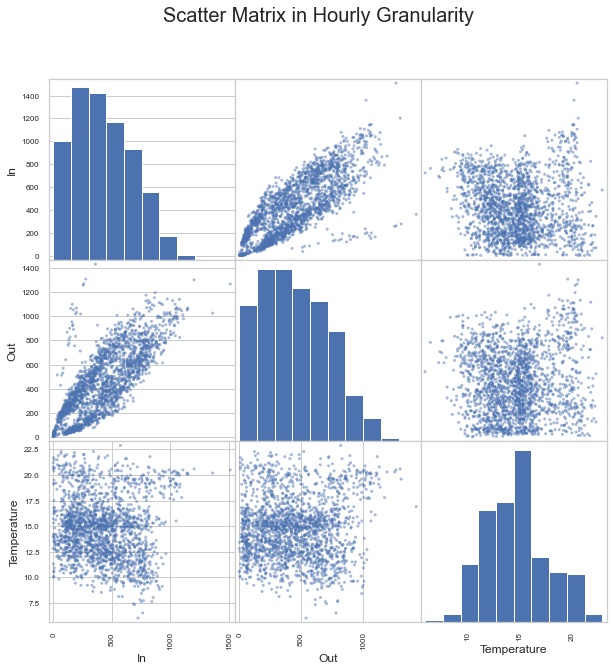

In [44]:
fig = pd.plotting.scatter_matrix(frame=merged_df[['In', 'Out', 'Temperature']],
       figsize=(10,10),alpha=0.5)
plt.grid(False)
plt.suptitle('Scatter Matrix in Hourly Granularity',fontsize=20)
plt.show()

There's a clear linear relationship between `in` and `out`. This makes sense, because usually when there's a lot of people coming into the library, there should also be many coming out. But it is quite disappointing to see such mess when looking at the `temperature` column. But note that we are observing at a hourly granularity, if we change it to a daily granularity, maybe thing can change.

In [45]:
# Extract date without time
merged_df['date'] = merged_df['datetime'].dt.date

median_columns = ['In', 'Out', 'Temperature']
keep_columns = ['Quarter']

# Group by date and calculate the median for specified columns
daily_df = merged_df.groupby('date').agg({**{col: 'median' for col in median_columns}, **{col: 'first' for col in keep_columns}}).reset_index()

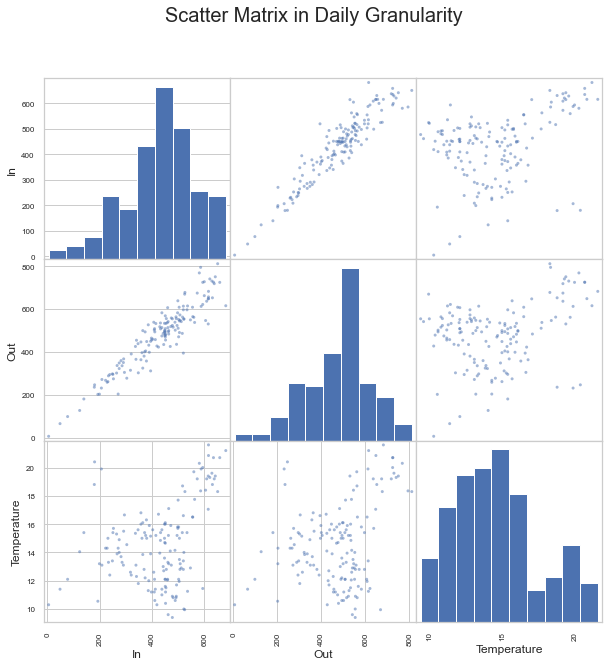

In [46]:
fig = pd.plotting.scatter_matrix(frame=daily_df[['In', 'Out', 'Temperature']],
       figsize=(10,10),alpha=0.5)
plt.grid(False)
plt.suptitle('Scatter Matrix in Daily Granularity',fontsize=20)
plt.show()

Take a closer look at the daily in/out flow and temperature.

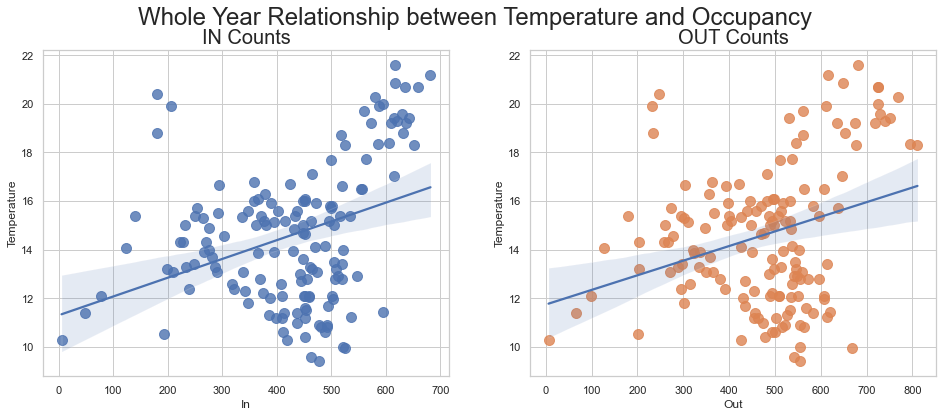

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.regplot(data=daily_df, x='In', y='Temperature', ax=axes[0], scatter_kws={'s': 100})
sns.regplot(data=daily_df, x='Out', y='Temperature', ax=axes[1], scatter_kws={'s': 100,'color':sns.color_palette()[1]})

axes[0].set_title('IN Counts',fontsize=20)
axes[1].set_title('OUT Counts',fontsize=20)

plt.suptitle('Whole Year Relationship between Temperature and Occupancy',fontsize=24)
plt.show()

When combining all quarters, the relationship is some what weak, as there's many values outside the confidence interval. Maybe things will be better when splitting up quarters to be individuals.

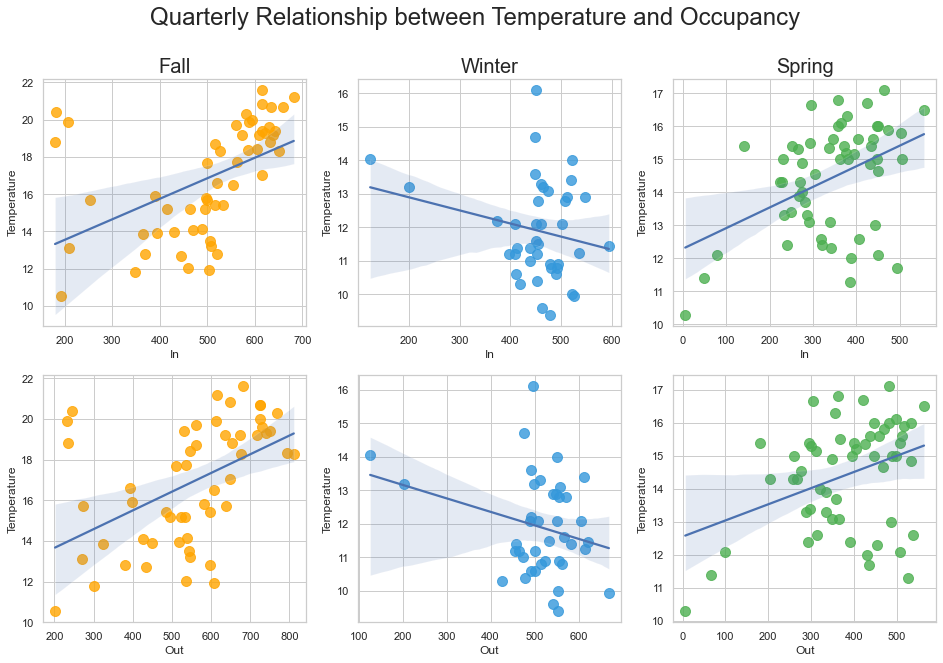

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Filter data for each quarter
fall_df = daily_df[daily_df['Quarter'] == 'Fall']
winter_df = daily_df[daily_df['Quarter'] == 'Winter']
spring_df = daily_df[daily_df['Quarter'] == 'Spring']

palette=['#FFA500', '#4CAF50', '#3498db']
# Create regression plots for the first row
sns.regplot(data=fall_df, x='In', y='Temperature', ax=axes[0, 0], scatter_kws={'s': 100,'color': '#FFA500'})
sns.regplot(data=winter_df, x='In', y='Temperature', ax=axes[0, 1], scatter_kws={'s': 100,'color': '#3498db'})
sns.regplot(data=spring_df, x='In', y='Temperature', ax=axes[0, 2], scatter_kws={'s': 100,'color':'#4CAF50'})

sns.regplot(data=fall_df, x='Out', y='Temperature', ax=axes[1, 0], scatter_kws={'s': 100,'color': '#FFA500'})
sns.regplot(data=winter_df, x='Out', y='Temperature', ax=axes[1, 1], scatter_kws={'s': 100,'color':'#3498db'})
sns.regplot(data=spring_df, x='Out', y='Temperature', ax=axes[1, 2], scatter_kws={'s': 100,'color': '#4CAF50'})
# Set titles for the first row
plt.suptitle('Quarterly Relationship between Temperature and Occupancy',fontsize=24)
axes[0, 0].set_title('Fall',fontsize=20)
axes[0, 1].set_title('Winter',fontsize=20)
axes[0, 2].set_title('Spring',fontsize=20)

plt.show()

# Conclusion

From the graph above, seems there is a weak linear relationship between temperature and in/out during Fall and Spring quarter. During Winter quarter, people just keep coming to Geisel regardless of temperature (Let's go Tritons!). 

We kinda shows that as temperature rises, more people visits Geisel, which proves our hypothesis. But we have to admit that there are outliers in both Fall and Winter quarter, not to mention Winter quarter.

We conclude that weather may be contributing to people's deciding on whether to go to Libraries, but many more factors may also interfere it. But it's also good to clear up the misconception about Geisel being crowed during Finals week. **It's Always crowed!**

# Ethics & Privacy


- Informed consent：I think that the data our team collected both the weather data and the traffic accident data from a trusted pubblic website,the official San Diego government website.

- Collection bias：The weather and traffic accident data are all observed events, and the data collected is more focued on the facts that happened instead of subjective observation. The factual focused data could help us reduce collection bias.

- Limit PII exposure： Our data, though collected from various person and events, do not contain much personally identifiable information, there are no obvious part in our data that can lead to identification of certain indivisual.

- Downstream bias mitigation: The data we are using are collected comprehensively thoughout all the traffic accidents rigardless of their race, gender or religious backgrounds.

-  Data security: Since the data are public accessible, our job of keeping our own data safe is to make our repo private and only grant access to relative indivisuals.

- Right to be forgotten: We'll open a contact portal to the public so that if anyone feels they wish to have their data removed, they have the freedom to do so.

- Data retention plan: We plan on delete the data we've collected after week 10

- Missing perspectives: We plan on talking to the TA and possibly the professor about our assumption to collect another point of view.

- Dataset bias: The dataset is collected by the San Diego government through factual events e.g. weather, temperature, the number and the type of traffic accidents that happened. In conclusion, I think our dataset is mostly bias free, but we can't rule out the bias created by the observer of the event. e.g police officer's view on an accident,

- Honest representation: we will try our best in representing the data without any bias

- Privacy in analysis: We will insure that data with PII are not used or displayed unless necessary for the analysis

- Auditability: We will insure that any analysis we conclude will be reasonable and reproducible

# Team Contributions

- Xueyan Shi: 
    - Dataset collection
    - Main designer for EDA and graphs
    - Team Management
- Leni Dai
    - Geisel EDA
    - Background
- Sungwook Min
    - Wong Avery EDA
    - Hypothesis
- Yang Yu
    - EDA summary
    - Privacy section
- Ahmad Rakha
    - Weather EDA
    - Timeline
